<a href="https://colab.research.google.com/github/klu2300080179/ml_projects/blob/main/emailclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [6]:
data=pd.read_csv("spam.csv",encoding='latin1')
print(data.head())
data=data[['v1','v2']]
data=data.rename(columns={'v1':'label','v2':'text'})
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
print(data.isnull().sum())
#by this we can able to see no null values are there but it is text no like that vlsaues are there we only didi just

label    0
text     0
dtype: int64


In [10]:
#meachine cant understand text that why canging to numbers make meachine to understand
""" first converitng label spam and ham and then the text with (different methods are there like countvectorization,tfidf)"""
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [14]:

#transforming text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer=TfidfVectorizer(stop_words='english')
y=data['label']
x=vectorizer.fit_transform(data['text'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape)

(5572, 8404)


In [15]:
#model for classification using decision trees
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(
    criterion='entropy',     # or 'gini' — decides how splits are made
    max_depth=15,            # limits tree growth (prevents overfitting)
    random_state=42
)
tree_model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [16]:
#prediccting outcome with test data
y_pred_tree = tree_model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9623318385650225

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       965
           1       0.94      0.77      0.85       150

    accuracy                           0.96      1115
   macro avg       0.95      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
 [[958   7]
 [ 35 115]]


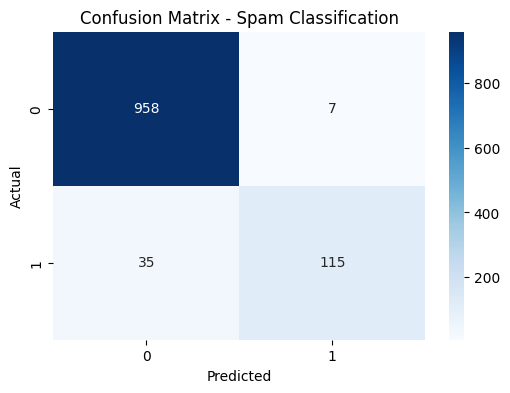

In [18]:
#visualization of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Spam Classification')
plt.show()


/tmp/ipython-input-2042834276.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')


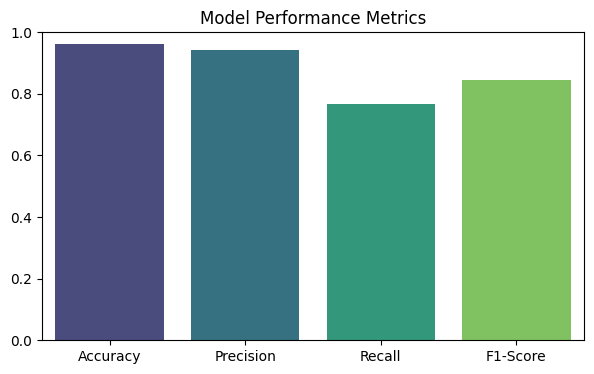

In [21]:
#we can see accuracy,precision,recall,f1-score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

scores = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree),
    'Recall': recall_score(y_test, y_pred_tree),
    'F1-Score': f1_score(y_test, y_pred_tree)
}

plt.figure(figsize=(7,4))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.show()
